Use RBM to perform feature extraction on an image-based dataset that you find or create. If you go this route, present the features you extract and explain why this is a useful feature extraction method in the context you’re operating in. DO NOT USE either the MNIST digit recognition database or the iris data set. They’ve been worked on in very public ways very very many times and the code is easily available. (However, that code could be a useful resource to refer to).

In [31]:
pip install tensorflow

     |████████████████████████████████| 102.7MB 6.0MB/s eta 0:00:01    |████                            | 13.1MB 5.8MB/s eta 0:00:16     |█████▍                          | 17.4MB 13.8MB/s eta 0:00:07     |██████                          | 19.4MB 13.8MB/s eta 0:00:07     |███████████████████             | 61.2MB 13.3MB/s eta 0:00:04     |███████████████████████▌        | 75.5MB 6.0MB/s eta 0:00:05
     |████████████████████████████████| 51kB 9.2MB/s  eta 0:00:01
     |████████████████████████████████| 3.8MB 11.3MB/s eta 0:00:01
     |████████████████████████████████| 61kB 6.5MB/s  eta 0:00:01
     |████████████████████████████████| 450kB 2.7MB/s eta 0:00:01
     |████████████████████████████████| 2.3MB 12.7MB/s eta 0:00:01
     |████████████████████████████████| 112kB 17.6MB/s eta 0:00:01
     |████████████████████████████████| 71kB 4.5MB/s  eta 0:00:01
     |████████████████████████████████| 51kB 9.1MB/s  eta 0:00:01
     |████████████████████████████████| 1.3MB 15.1MB/s eta 0:00:01
  

In [87]:
# Set up & handling the data
import os
os.chdir('/Users/sophiaperides/Desktop/Thinkful')
import csv
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings(action="ignore")

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.neural_network import BernoulliRBM as RBM
from sklearn import datasets, metrics
from sklearn.datasets import fetch_openml
import tensorflow as tf

import time
import seaborn as sns

Use RBM to perform feature extraction on an image-based dataset that you find or create. If you go this route, present the features you extract and explain why this is a useful feature extraction method in the context you’re operating in. DO NOT USE either the MNIST digit recognition database or the iris data set. They’ve been worked on in very public ways very very many times and the code is easily available. (However, that code could be a useful resource to refer to).

In [50]:
cancer = pd.read_csv('skincancer.csv')
cancer = pd.DataFrame(cancer)
print(cancer.columns)
print('\n', cancer.describe())
cancer.info()


Index(['pixel0000', 'pixel0001', 'pixel0002', 'pixel0003', 'pixel0004',
       'pixel0005', 'pixel0006', 'pixel0007', 'pixel0008', 'pixel0009',
       ...
       'pixel2343', 'pixel2344', 'pixel2345', 'pixel2346', 'pixel2347',
       'pixel2348', 'pixel2349', 'pixel2350', 'pixel2351', 'label'],
      dtype='object', length=2353)

           pixel0000     pixel0001    pixel0002     pixel0003     pixel0004  \
count  10015.000000  10015.000000  10015.00000  10015.000000  10015.000000   
mean     181.056415    131.728407    141.24024    187.274488    137.089466   
std       59.746698     45.043473     48.67267     54.021274     41.138096   
min        0.000000      0.000000      0.00000      0.000000      0.000000   
25%      158.000000    117.000000    123.00000    165.000000    122.000000   
50%      198.000000    141.000000    151.00000    201.000000    144.000000   
75%      224.000000    159.000000    172.00000    226.000000    162.000000   
max      255.000000    246.000000    255.00

In [51]:
y = cancer.label
cancer.drop(columns=['label'], inplace=True)

print(X.shape, y.shape)
X_std = StandardScaler().fit_transform(cancer)


(10015, 2352) (10015,)


## PCA

Two components account for 50% of the variance and six for 75%.

In [78]:
# pca = PCA(n_components=2)
# pca_components = pca.fit_transform(X_std)
# print(pca.explained_variance_ratio_)


pca_75 = PCA(n_components=.75)
components_75 = pca_75.fit_transform(X_std)
# print(components_75.explained_variance_)
print(pca_75.explained_variance_ratio_)
pca_75.components_



[0.34918535 0.19008367 0.1250629  0.03416694 0.03342177 0.03066172]


array([[-0.01441571, -0.01991092, -0.01956472, ..., -0.01537571,
        -0.01961969, -0.01976381],
       [-0.03522583, -0.02143193, -0.0206892 , ..., -0.03401646,
        -0.02275858, -0.01890615],
       [-0.00194438,  0.01566991,  0.01728103, ...,  0.00312742,
         0.01716258,  0.021615  ],
       [ 0.01804411,  0.02487654,  0.0251123 , ...,  0.00642149,
         0.00680652,  0.00913644],
       [ 0.00671477,  0.01236898,  0.01512841, ...,  0.01340082,
         0.02045478,  0.0232922 ],
       [ 0.00509907,  0.00651984,  0.00759232, ..., -0.00151953,
        -0.00237866, -0.00138063]])

In [82]:
pca_75_1 = pca_75.components_[0] * pca_75.components_[1] * pca_75.components_[2]
pca_75_2 = pca_75.components_[3] * pca_75.components_[4] * pca_75.components_[5]

Feature Importance:  [0.34918535 0.19008367 0.1250629  0.03416694 0.03342177 0.03066172]
Cluster Graph with PCA 


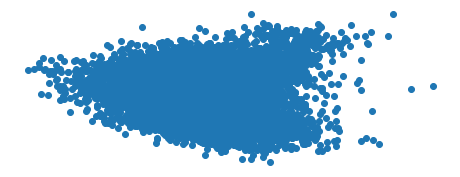

In [84]:

pca = PCA(n_components=.75)
pca_components = pca.fit_transform(X_std)
print('Feature Importance: ', pca.explained_variance_ratio_)

print('Cluster Graph with PCA ')
plt.figure(figsize=(8,3))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

## t-SNE

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 10015 samples in 1.652s...
[t-SNE] Computed neighbors for 10015 samples in 448.360s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10015
[t-SNE] Computed conditional probabilities for sample 2000 / 10015
[t-SNE] Computed conditional probabilities for sample 3000 / 10015
[t-SNE] Computed conditional probabilities for sample 4000 / 10015
[t-SNE] Computed conditional probabilities for sample 5000 / 10015
[t-SNE] Computed conditional probabilities for sample 6000 / 10015
[t-SNE] Computed conditional probabilities for sample 7000 / 10015
[t-SNE] Computed conditional probabilities for sample 8000 / 10015
[t-SNE] Computed conditional probabilities for sample 9000 / 10015
[t-SNE] Computed conditional probabilities for sample 10000 / 10015
[t-SNE] Computed conditional probabilities for sample 10015 / 10015
[t-SNE] Mean sigma: 6.544685
[t-SNE] KL divergence after 250 iterations with early exaggeration: 96.836426
[t-SNE] K

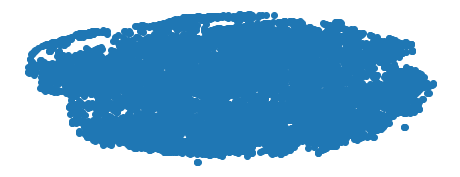

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 10015 samples in 1.465s...
[t-SNE] Computed neighbors for 10015 samples in 458.187s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10015
[t-SNE] Computed conditional probabilities for sample 2000 / 10015
[t-SNE] Computed conditional probabilities for sample 3000 / 10015
[t-SNE] Computed conditional probabilities for sample 4000 / 10015
[t-SNE] Computed conditional probabilities for sample 5000 / 10015
[t-SNE] Computed conditional probabilities for sample 6000 / 10015
[t-SNE] Computed conditional probabilities for sample 7000 / 10015
[t-SNE] Computed conditional probabilities for sample 8000 / 10015
[t-SNE] Computed conditional probabilities for sample 9000 / 10015
[t-SNE] Computed conditional probabilities for sample 10000 / 10015
[t-SNE] Computed conditional probabilities for sample 10015 / 10015
[t-SNE] Mean sigma: 7.394367
[t-SNE] KL divergence after 250 iterations with early exaggeration: 90.847649
[t-SNE] K

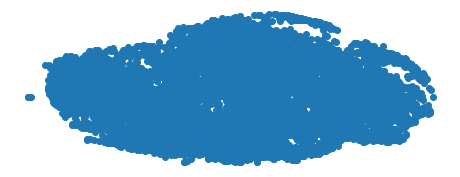

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10015 samples in 1.330s...
[t-SNE] Computed neighbors for 10015 samples in 454.576s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10015
[t-SNE] Computed conditional probabilities for sample 2000 / 10015
[t-SNE] Computed conditional probabilities for sample 3000 / 10015
[t-SNE] Computed conditional probabilities for sample 4000 / 10015
[t-SNE] Computed conditional probabilities for sample 5000 / 10015
[t-SNE] Computed conditional probabilities for sample 6000 / 10015
[t-SNE] Computed conditional probabilities for sample 7000 / 10015
[t-SNE] Computed conditional probabilities for sample 8000 / 10015
[t-SNE] Computed conditional probabilities for sample 9000 / 10015
[t-SNE] Computed conditional probabilities for sample 10000 / 10015
[t-SNE] Computed conditional probabilities for sample 10015 / 10015
[t-SNE] Mean sigma: 7.894533
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.097969
[t-SNE] K

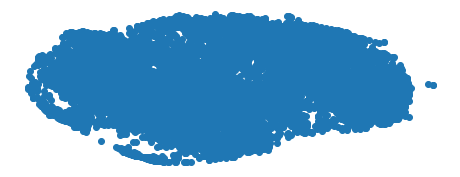

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10015 samples in 2.409s...
[t-SNE] Computed neighbors for 10015 samples in 439.579s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10015
[t-SNE] Computed conditional probabilities for sample 2000 / 10015
[t-SNE] Computed conditional probabilities for sample 3000 / 10015
[t-SNE] Computed conditional probabilities for sample 4000 / 10015
[t-SNE] Computed conditional probabilities for sample 5000 / 10015
[t-SNE] Computed conditional probabilities for sample 6000 / 10015
[t-SNE] Computed conditional probabilities for sample 7000 / 10015
[t-SNE] Computed conditional probabilities for sample 8000 / 10015
[t-SNE] Computed conditional probabilities for sample 9000 / 10015
[t-SNE] Computed conditional probabilities for sample 10000 / 10015
[t-SNE] Computed conditional probabilities for sample 10015 / 10015
[t-SNE] Mean sigma: 8.242010
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.328560
[t-SNE] 

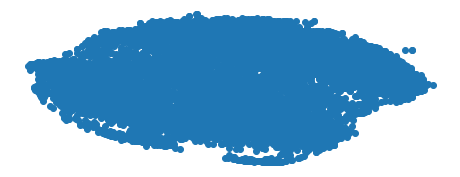

In [85]:
for perplexity in [10, 20, 30, 40]:
    tsne = TSNE(n_components=2, verbose=1, perplexity=perplexity, n_iter=300)
    tsne_results = tsne.fit_transform(X_std)
    print('Cluster Graph with t-SNE with Perplexity ', perplexity)
    plt.figure(figsize=(8,3))
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()

## UMAP

It's pretty clear that UMAP does best with five neighbors with a minimum distance of 0.01.

UMAP with  5 neighbors and  0.01 minimum distance.


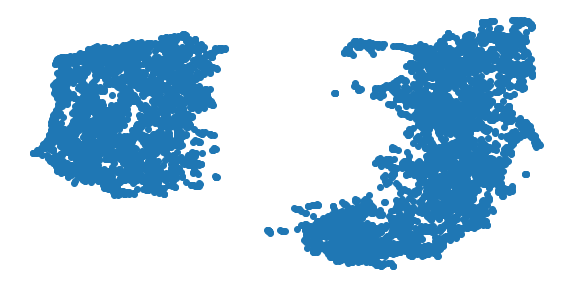



UMAP with  5 neighbors and  0.1 minimum distance.


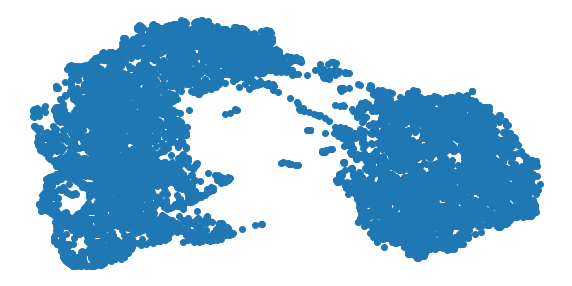



UMAP with  5 neighbors and  0.5 minimum distance.


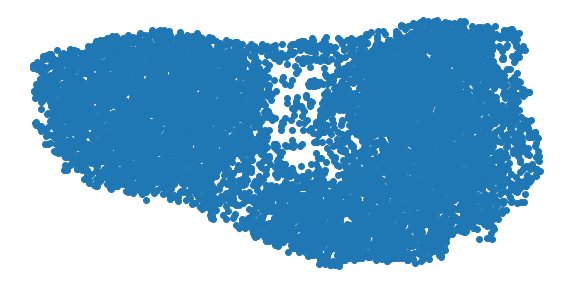



UMAP with  10 neighbors and  0.01 minimum distance.


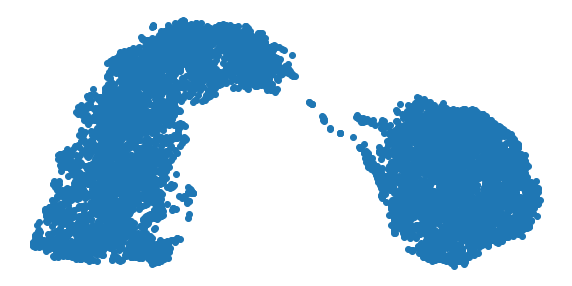



UMAP with  10 neighbors and  0.1 minimum distance.


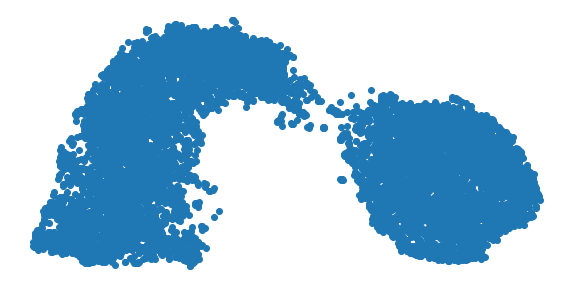



UMAP with  10 neighbors and  0.5 minimum distance.


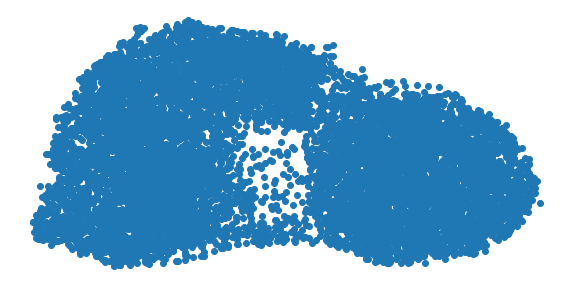



UMAP with  15 neighbors and  0.01 minimum distance.


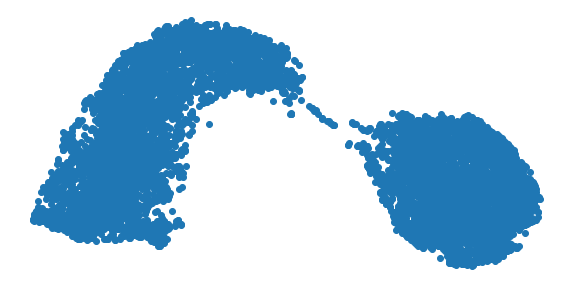



UMAP with  15 neighbors and  0.1 minimum distance.


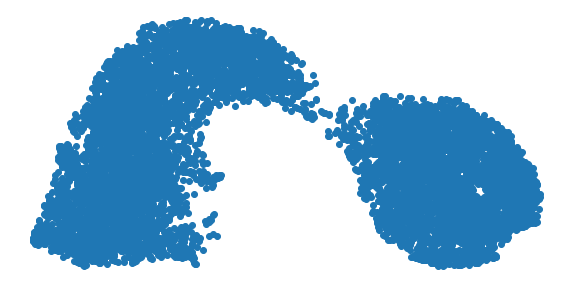



UMAP with  15 neighbors and  0.5 minimum distance.


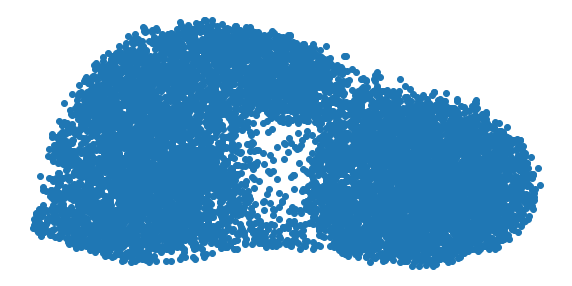



UMAP with  25 neighbors and  0.01 minimum distance.


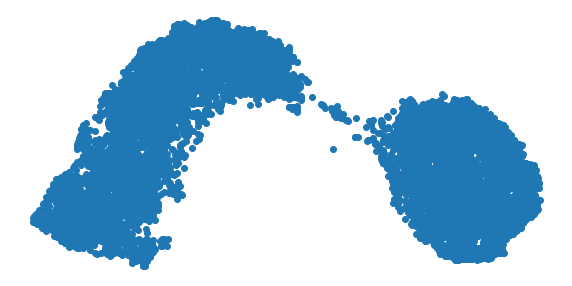



UMAP with  25 neighbors and  0.1 minimum distance.


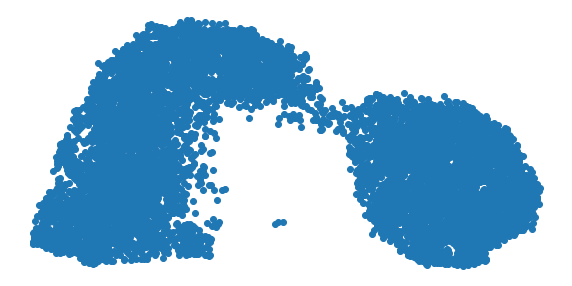



UMAP with  25 neighbors and  0.5 minimum distance.


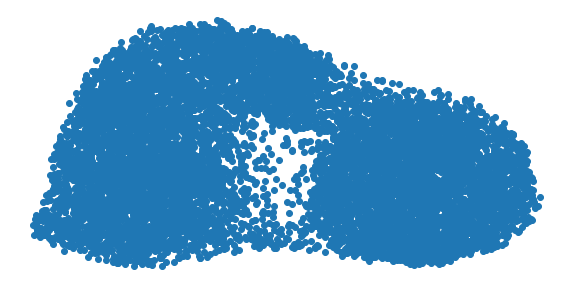

In [86]:
for n_neighbors in [5, 10, 15, 25]:
    for min_dist in [ 0.01, 0.1, 0.5]:
        umap_results = umap.UMAP(n_neighbors=n_neighbors,
                      min_dist=min_dist,
                      metric='correlation').fit_transform(X_std)
        print('UMAP with ', n_neighbors, 'neighbors and ', min_dist, 'minimum distance.')
        plt.figure(figsize=(10,5))
        plt.scatter(umap_results[:, 0], umap_results[:, 1])
        plt.xticks([])
        plt.yticks([])
        plt.axis('off')
        plt.show()
        print('\n')

## RBM

RBM with  200 components and 0.0001 learning rate.


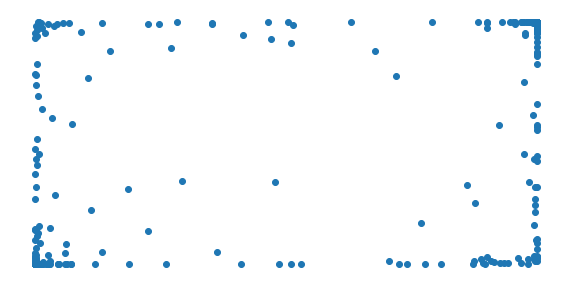



RBM with  200 components and 0.001 learning rate.


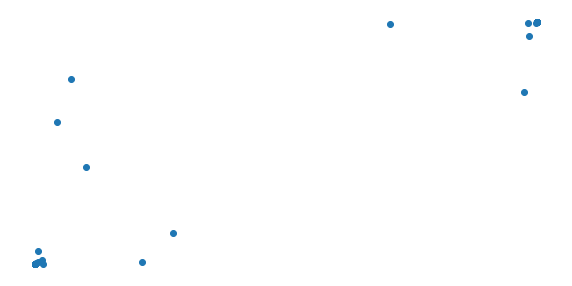



RBM with  200 components and 0.01 learning rate.


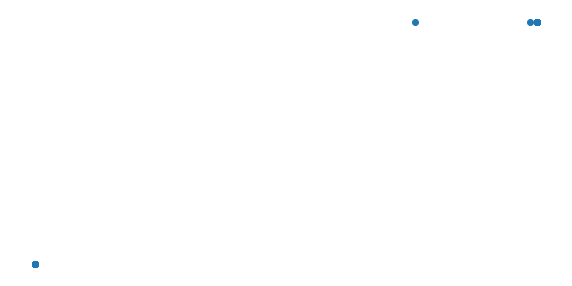



RBM with  500 components and 0.0001 learning rate.


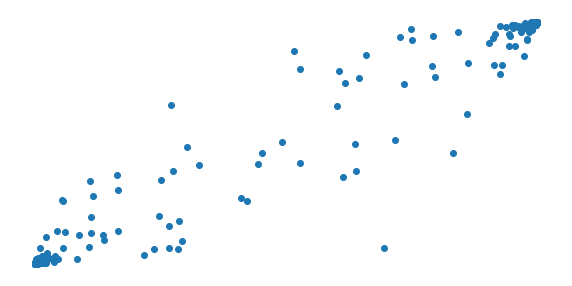



RBM with  500 components and 0.001 learning rate.


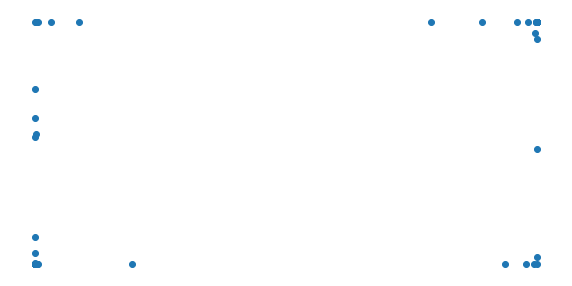



RBM with  500 components and 0.01 learning rate.


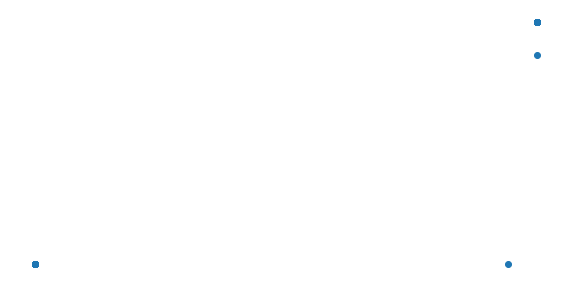



RBM with  700 components and 0.0001 learning rate.


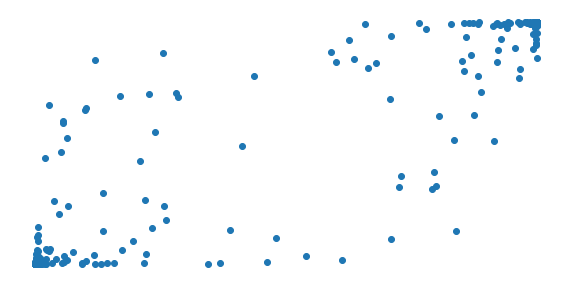



RBM with  700 components and 0.001 learning rate.


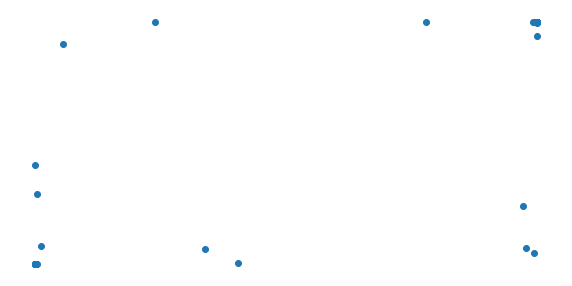



RBM with  700 components and 0.01 learning rate.


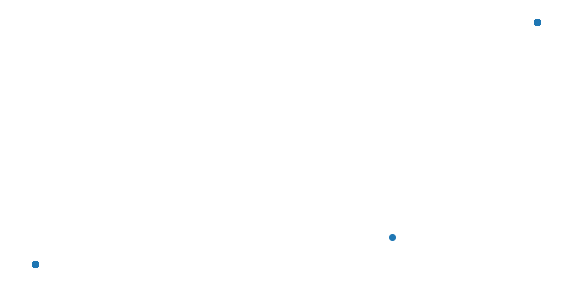

In [90]:
for n_components in [200, 500, 700]:
    for learning_rate in [0.0001, 0.001, 0.01]:
        rbm_results = RBM(n_components=n_neighbors,
                      learning_rate=learning_rate).fit_transform(X_std)
        print('RBM with ', n_components, 'components and', learning_rate, 'learning rate.')
        plt.figure(figsize=(10,5))
        plt.scatter(rbm_results[:, 0], rbm_results[:, 1])
        plt.xticks([])
        plt.yticks([])
        plt.axis('off')
        plt.show()
        print('\n')
        
